# Standard Deviation Document

In [2]:
#Read packages into R
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [3]:
#reading the dataset and shortening the column names
pulsar_base_data = read_csv("https://raw.githubusercontent.com/NicoRui/DSCI_100_Project/main/pulsar_data_train.csv", skip = 1,
                            col_names = c("mean_prof", "sd_prof", 
                                          "kurt_prof", "skew_prof", "mean_DMSNR",
                                          "sd_DMSNR","kurt_DMSNR","skew_DMSNR", "target_class")) %>% 
                    mutate(target_class = as_factor(target_class)) %>% 
                    mutate(target_class = fct_recode(target_class,
                                                    "non_pulsar" = '0',
                                                    "pulsar" = '1')) 
           
head(pulsar_base_data)

Parsed with column specification:
cols(
  mean_prof = col_double(),
  sd_prof = col_double(),
  kurt_prof = col_double(),
  skew_prof = col_double(),
  mean_DMSNR = col_double(),
  sd_DMSNR = col_double(),
  kurt_DMSNR = col_double(),
  skew_DMSNR = col_double(),
  target_class = col_double()
)



mean_prof,sd_prof,kurt_prof,skew_prof,mean_DMSNR,sd_DMSNR,kurt_DMSNR,skew_DMSNR,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
121.15625,48.37297,0.3754847,-0.01316549,3.168896,18.39937,7.449874,65.159298,non_pulsar
76.96875,36.17556,0.7128979,3.38871856,2.399666,17.57100,9.414652,102.722975,non_pulsar
130.58594,53.22953,0.1334083,-0.29724164,2.743311,22.36255,8.508364,74.031324,non_pulsar
156.39844,48.86594,-0.2159886,-0.17129365,17.471572,NA,2.958066,7.197842,non_pulsar
84.80469,36.11766,0.8250128,3.27412537,2.790134,20.61801,8.405008,76.291128,non_pulsar
121.00781,47.17694,0.2297081,0.09133623,2.036789,NA,9.546051,112.131721,non_pulsar


In [4]:
set.seed(632)
pulsar_split = initial_split(pulsar_base_data, prop = 0.8, strata = target_class)
pulsar_train = training(pulsar_split)
pulsar_test = testing(pulsar_split)
head(pulsar_train); head(pulsar_test)

mean_prof,sd_prof,kurt_prof,skew_prof,mean_DMSNR,sd_DMSNR,kurt_DMSNR,skew_DMSNR,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
121.15625,48.37297,0.3754847,-0.01316549,3.168896,18.39937,7.4498741,65.159298,non_pulsar
76.96875,36.17556,0.7128979,3.38871856,2.399666,17.57100,9.4146523,102.722975,non_pulsar
130.58594,53.22953,0.1334083,-0.29724164,2.743311,22.36255,8.5083638,74.031324,non_pulsar
84.80469,36.11766,0.8250128,3.27412537,2.790134,20.61801,8.4050084,76.291128,non_pulsar
121.00781,47.17694,0.2297081,0.09133623,2.036789,NA,9.5460511,112.131721,non_pulsar
79.34375,42.40217,1.0634129,2.24437669,141.641304,NA,-0.7008088,-1.200653,non_pulsar


mean_prof,sd_prof,kurt_prof,skew_prof,mean_DMSNR,sd_DMSNR,kurt_DMSNR,skew_DMSNR,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
156.3984,48.86594,-0.21598860,-0.17129365,17.471572,NA,2.958066,7.197842,non_pulsar
83.9375,45.71272,0.74877682,1.34290171,1.747492,12.07058,11.838557,NA,non_pulsar
111.7109,46.57054,0.27286063,-0.06164600,2.139632,16.65571,9.353872,97.733760,non_pulsar
127.3281,45.33954,-0.02866461,-0.20653223,3.955686,26.25178,6.815905,46.623791,non_pulsar
108.7578,47.47084,0.23388338,-0.01183974,3.428930,22.80573,7.431087,58.339075,non_pulsar
117.6797,47.45704,0.21480140,-0.13550329,2.731605,21.99329,8.401669,71.587641,non_pulsar


In [5]:
#Pulsar train and test with no NAs
pulsar_train_noNA = drop_na(pulsar_train)
pulsar_test_noNA = drop_na(pulsar_test)

#Standardization of all predictor variables
sd_recipe_train = recipe(target_class ~ sd_prof + sd_DMSNR, data = pulsar_train_noNA) %>% 
                    step_scale(all_predictors()) %>% 
                    step_center(all_predictors()) %>% 
                    prep()
scaled_sd_train = bake(sd_recipe_train, pulsar_train_noNA)
head(scaled_sd_train)

sd_recipe_test = recipe(target_class ~ sd_prof + sd_DMSNR, data = pulsar_test_noNA) %>% 
                    step_scale(all_predictors()) %>% 
                    step_center(all_predictors()) %>% 
                    prep()
scaled_sd_test = bake(sd_recipe_test, pulsar_test_noNA)
head(scaled_sd_test)

sd_prof,sd_DMSNR,target_class
<dbl>,<dbl>,<fct>
0.2727719,-0.4052351,non_pulsar
-1.5067285,-0.4474260,non_pulsar
0.9813036,-0.2033806,non_pulsar
-1.5151753,-0.2922344,non_pulsar
1.3727288,-0.3493541,non_pulsar
-0.9167066,-0.4144857,non_pulsar


sd_prof,sd_DMSNR,target_class
<dbl>,<dbl>,<fct>
0.002139272,-0.498483074,non_pulsar
-0.187662501,0.001776142,non_pulsar
0.140952188,-0.177872560,non_pulsar
0.138825140,-0.220226313,non_pulsar
-0.885023856,-0.259193888,non_pulsar
0.430033563,0.157397274,non_pulsar


## Kurtosis

In [6]:
set.seed(781)
sd_vfold = vfold_cv(scaled_sd_train, v = 5, strata = target_class)
gridvals = tibble(neighbors = seq(10,60))
knn_sd_spec = nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
    set_engine("kknn") %>% 
    set_mode("classification")    

In [7]:
set.seed(781)
sd_fit = workflow() %>% 
    add_recipe(sd_recipe_train) %>% 
    add_model(knn_sd_spec) %>% 
    tune_grid(resamples = sd_vfold, grid = gridvals) %>% 
    collect_metrics() #or accuracy

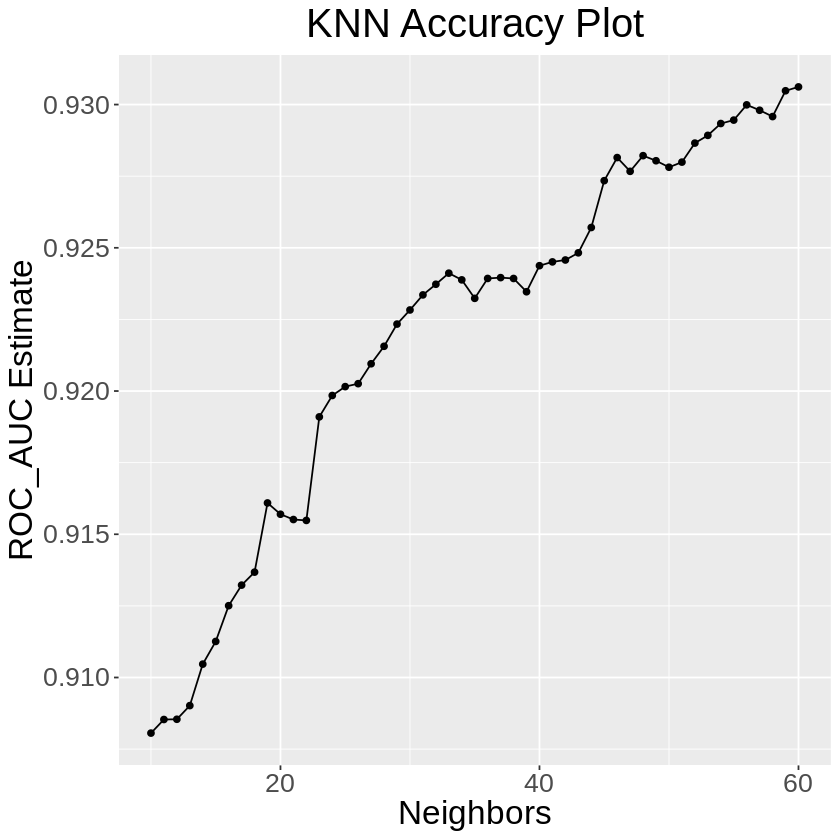

In [8]:
sdFitROC = filter(sd_fit, .metric == "roc_auc")

ROC_plot = ggplot(sdFitROC, aes(x = neighbors, y = mean)) +
  geom_point() + 
  geom_line() +
  labs(x = "Neighbors", y = "ROC_AUC Estimate", title = "KNN Accuracy Plot") +
  theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 20))
ROC_plot

In [9]:
BestK = sdFitROC %>% 
    arrange(desc(mean)) %>% 
    slice(1)
BestK

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
60,roc_auc,binary,0.9306164,5,0.003395774,Model51
